* Glimpse of data
* Data analysing
* Data imputing
* Feature engineering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


Checking the Given Data

In [2]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
#train.info()

In [4]:
#test.info()

Combining train data and test data.

In [5]:
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop(['SalePrice','Id'],axis=1)
data.shape

(2919, 79)

In [6]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

**SalePrice & Normalisation**

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

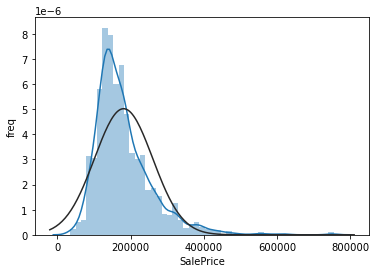

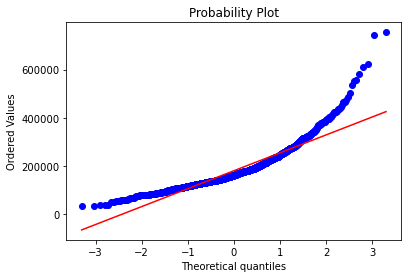

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
fig1=plt.figure()
sns.distplot(train['SalePrice'],fit=norm)
plt.ylabel('freq')
fig2=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

SalePrice is right_skewed,we need to apply non linear transformation in order to convert the SalePrice in to normal distribution.
Normalization is useful when data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.


In [8]:
(train.corr())['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

From this we can say that features like OverallQual,GliveArea,GarageCars,GarageArea,TotalBsmtSF are correlated with the target i.e SalesPrice.
The four assumption of regression model:
*     Linearity: The relationship between X and the mean of Y is linear.
*     Homoscedasticity: The variance of residual is the same for any value of X.
*     Independence: Observations are independent of each other.
*     Normality: For any fixed value of X, Y is normally distributed.

Because of the correlation between the target variable and features mentioned above  Homoscedasticity assumption is violated.This can be solved by applying non linear transformation.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

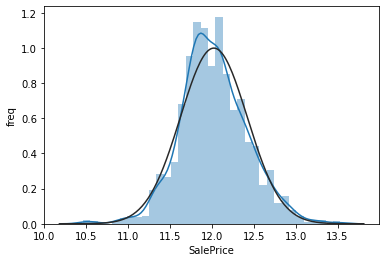

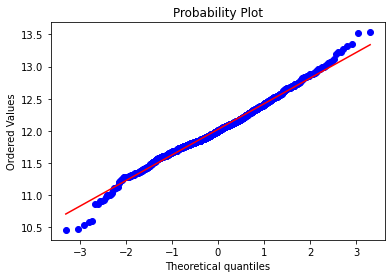

In [9]:
train['SalePrice']=np.log(train['SalePrice'])
fig1=plt.figure()
sns.distplot(train['SalePrice'],fit=norm)
plt.ylabel('freq')
fig2=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

Distribution plot and Probabilty plot after non linear(log) transformation.

**Data Correlation**

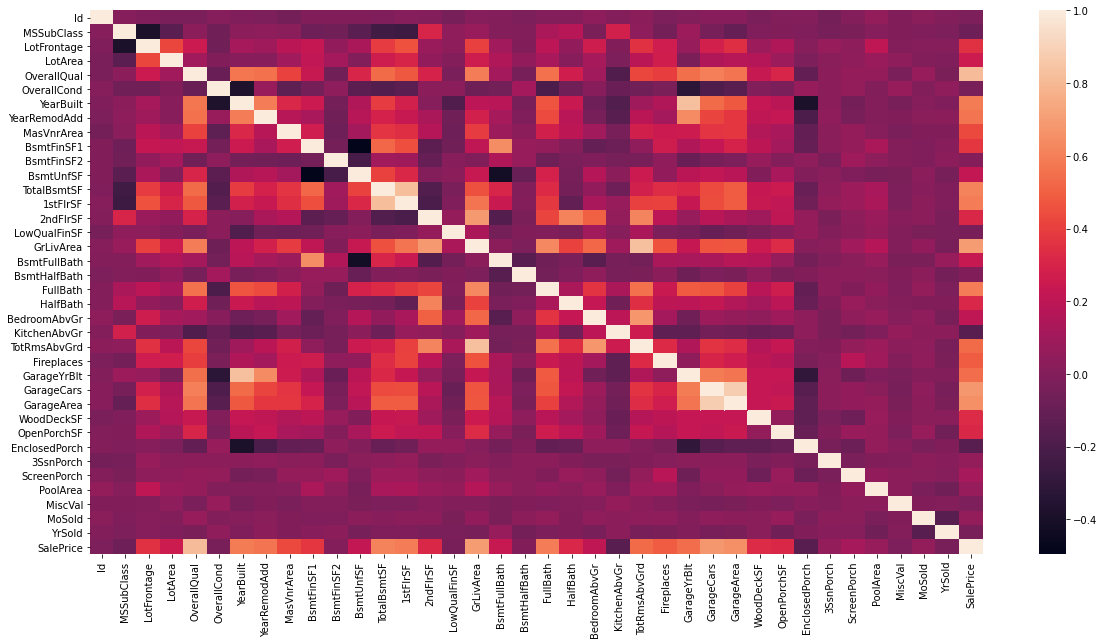

In [10]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(train.corr())
plt.show()
#train.corr()

We can see the corealated features,for example
 
 GarageCars and GarageArea,
 GarageYrBlt and YearBuilt,
  TotRmsAbvGrd and GrLivArea ......
 


**Missing Data**

Text(0.5, 1.0, 'Features that have missing values')

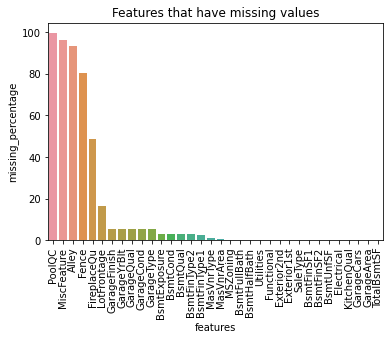

In [11]:
data_missper=(data.isnull().sum()/data.shape[0])*100
data_missper=data_missper.drop(data_missper[data_missper==0].index).sort_values(ascending=False)
sns.barplot(x=data_missper.index,y=data_missper)
plt.xticks(rotation='90')
plt.xlabel('features')
plt.ylabel('missing_percentage')
plt.title('Features that have missing values')
#print(data_missper)

In [12]:
miss_features=list(data_missper.drop(data_missper[data_missper==0].index).index)
#print(len(miss_features))
object_t=[]
float_int=[]
for i in miss_features:
    if(train[i].dtype==object):
        object_t.append(i)
    else:
        float_int.append(i)
print(object_t)
print(float_int)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Electrical', 'KitchenQual']
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


For example if in 'PoolQc'(pool quality) if there is no value then it means house doesnt have pool,so assign None.

Similarly for 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'.

In case of int data types fill with 0 instead of none.

-->Check if the feature has small number of missing values and has highly repeated value,then assign that to the missing data.

-->If we cannot say particular value is highly repeated then check some other feature which we can link and fill according to that.

for example in LotFrontage we can groupby Neighborhood and find most frequent value of LotFrontage according to to each group and then fill the missing by checking the Neighborhood value of that missing row and fill with most frequent LotFrontage value of that particular Neighborhood value.

In [13]:
object_missing_val=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
for i in object_missing_val:
    data[i]=data[i].fillna('None')
int_missing_val=['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
for i in int_missing_val:
    data[i]=data[i].fillna(0)

In [14]:
#fill missing values of LotFrontage based on Neighborhood.
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))

In [15]:
#converting numerical values into categorical values.
data['YrSold']=data['YrSold'].astype(str)
data['MoSold']=data['MoSold'].astype(str)
data['MSSubClass']=data['MSSubClass'].astype(str)

In [16]:
#fill missing values of MSZoning based on MSSubClass.
data['MSZoning']=data.groupby('MSSubClass')['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))

Use data['columnname'].describe()

to get most frequent value,no of entries that are registered(total-missing).

In [17]:
#data[['OverallCond','Utilities']].groupby('Utilities').mean()
#data[data['Utilities']=='NoSeWa'].OveraQual
#data['Utilites'].describe()
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])

In [18]:
#data[['Functional','OverallQual']].groupby('Functional').mean()
#data['Functional'].describe()
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])

In [19]:
#data['Exterior1st'].describe()
#data['Exterior2nt'].describe()
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [20]:
#data['SaleType'].describe()
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])

In [21]:
#data['Electrical'].describe()
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

In [22]:
#data['KitchenQual'].describe()
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

**Feature Engineering**

In [23]:
data['TotalSF']=(data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF'])
data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']
data['Total_sqr_footage']=(data['BsmtFinSF1']+ data['BsmtFinSF2']+ data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_Bathrooms'] = (data['FullBath']+(0.5 * data['HalfBath'])+ data['BsmtFullBath']+(0.5 * data['BsmtHalfBath']))
data['Total_porch_sf'] = (data['OpenPorchSF']+data['3SsnPorch']+data['EnclosedPorch']+data['ScreenPorch']+data['WoodDeckSF'])
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Like SalePrice,some of features may be skewed we need to fix that.

In [24]:
num_features=data.dtypes[data.dtypes != 'object'].index
skew_features=data[num_features].apply(lambda x:skew(x)).sort_values(ascending=False)
print(skew_features)

MiscVal              21.947195
PoolArea             16.898328
haspool              14.884318
LotArea              12.822431
LowQualFinSF         12.088761
3SsnPorch            11.376065
KitchenAbvGr          4.302254
BsmtFinSF2            4.146143
EnclosedPorch         4.003891
ScreenPorch           3.946694
BsmtHalfBath          3.931594
MasVnrArea            2.613592
OpenPorchSF           2.535114
WoodDeckSF            1.842433
Total_sqr_footage     1.834437
TotalSF               1.511479
1stFlrSF              1.469604
LotFrontage           1.460429
BsmtFinSF1            1.425230
Total_porch_sf        1.376649
GrLivArea             1.269358
TotalBsmtSF           1.156894
BsmtUnfSF             0.919339
2ndFlrSF              0.861675
TotRmsAbvGrd          0.758367
Fireplaces            0.733495
HalfBath              0.694566
BsmtFullBath          0.624832
OverallCond           0.570312
Total_Bathrooms       0.492247
BedroomAbvGr          0.326324
has2ndfloor           0.288675
GarageAr

Example-'LotFrontage' is right skewed.

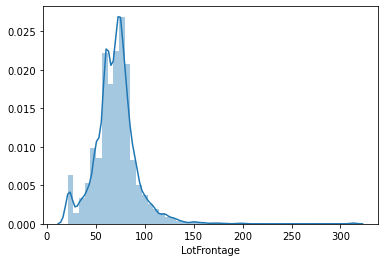

In [25]:
sns.distplot(data['LotFrontage'])

In [26]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
moreSkew_features=skew_features[abs(skew_features)>0.5].index
for feature in moreSkew_features:
    data[feature]=boxcox1p(data[feature],boxcox_normmax(data[feature] + 1))


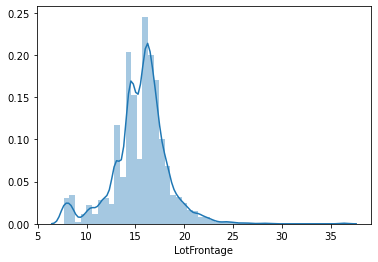

In [27]:
sns.distplot(data['LotFrontage'])

Adding new features

In [28]:
data.drop(['PoolQC','Utilities','Street'],axis=1)
data_new=pd.get_dummies(data)
train_data=data_new.iloc[:train.shape[0],:]
test_data=data_new.iloc[train.shape[0]:,:]
y=train['SalePrice']
print(train_data.shape)
print(test_data.shape)

(1460, 342)
(1459, 342)


Skewed features after object type features are converted based on one hot encoding.

In [29]:
int_skew=[]
count=0
for i in train_data.columns:
    flag=train_data[i].value_counts()
    percen=(flag.iloc[0]/train_data.shape[0])*100
    if(percen>99.94):
        print(percen)
        count=count+1
        int_skew.append(i)
print(int_skew)
print(count)
train_data=train_data.drop(int_skew,axis=1)
test_data=test_data.drop(int_skew,axis=1)
print(train_data.shape)
print(test_data.shape)

100.0
['MSSubClass_150']
1
(1460, 341)
(1459, 341)


**Modelling**

In [30]:
from sklearn.model_selection import train_test_split as tts
#y=train['SalePrice']
X=train_data
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.33,random_state=2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(978, 341) (978,) (482, 341) (482,)


In [31]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
#print(mean_squared_error(y_test,y_pred))
print(lin_reg.score(X_test,y_test))
print(lin_reg.score(X_train,y_train))

0.39820141014986976
0.42947532219241646


From this we can see that both train accuracy and train accuracy are too low ,which means hypothesis function is underfitting.

In [33]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
print(rmse(y_test,xgb.predict(X_test)))

0.15869173225134758


**Fitting efficiently**

In [34]:
from sklearn.model_selection import KFold
kfolds=KFold(n_splits=5,shuffle=True,random_state=5)
def rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  RobustScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [36]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [37]:
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=alphas_alt, cv=kfolds))
ridge.fit(X_train,y_train)
lasso=make_pipeline(RobustScaler(),LassoCV(max_iter=1e7,alphas=alphas2,random_state=2,cv=kfolds))
lasso.fit(X_train,y_train)
elasticnet=make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
elasticnet.fit(X_train,y_train)
svr=SVR()
svr.fit(X_train,y_train)
#xgb=XGBRegressor()
xgb=XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
xgb.fit(X_train,y_train)
lightgbm=LGBMRegressor(objective='regression',num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,)
#lightgbm=LGBMRegressor()
lightgbm.fit(X_train,y_train)
stack=StackingCVRegressor(regressors=(ridge,lasso,elasticnet,svr,xgb,lightgbm),meta_regressor=xgb,use_features_in_secondary=True)
stack.fit(X_train,y_train)

[13:16:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:47] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:19] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:42] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:42] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:07] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:07] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of re

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.7, gamma=0,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.01,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=0, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=3460, n_jobs=-1,
                                                nthread=-...
     

In [38]:
def ensemble_gen(X):
    return ((0.1*elasticnet.predict(X))+(0.05*lasso.predict(X))+(0.2*ridge.predict(X))+(0.1*svr.predict(X))+(0.1*xgb.predict(X))+(0.15*lightgbm.predict(X))+(0.3*stack.predict(np.array(X))))
print(rmse(y_test,ensemble_gen(X_test)))

0.14584051698952621


In [39]:
regressors=[ridge,lasso,elasticnet,xgb,lightgbm,svr]
for i in regressors:
    pred=i.predict(X_test)
    print(rmse(y_test,pred))

0.16859105184833625
0.16472080648310453
0.16472080648310453
0.14915054164625674
0.14743599963220577
0.3148141962074335


In [40]:
#predict=0.1*ridge.predict(test_data)+0.05*lasso.predict(test_data)+0.15*elasticnet.predict(test_data)+0.15*svr.predict(test_data)+0.35*xgb.predict(test_data)+0.20*lightgbm.predict(test_data)
predict=ensemble_gen(test_data)
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(predict))
submission.to_csv("submission.csv", index=False)